In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [3]:
# reading the training and testing dataset csv files
training = pd.read_csv("training.csv")
testing = pd.read_csv("testing.csv")
test_label = pd.read_csv("test_label.csv")

#converting the totalcharges column from object dtype to float
training["TotalCharges"] = pd.to_numeric(training["TotalCharges"], errors='coerce')

# dropping the NaN values in the dataset
training_data= training.dropna(axis= 0, how='any')

In [4]:
# assigning x_train and y_train 
X1_train = training_data[['TotalCharges']]
y1_train = training_data[['Churn']]

<AxesSubplot:xlabel='TotalCharges', ylabel='Churn'>

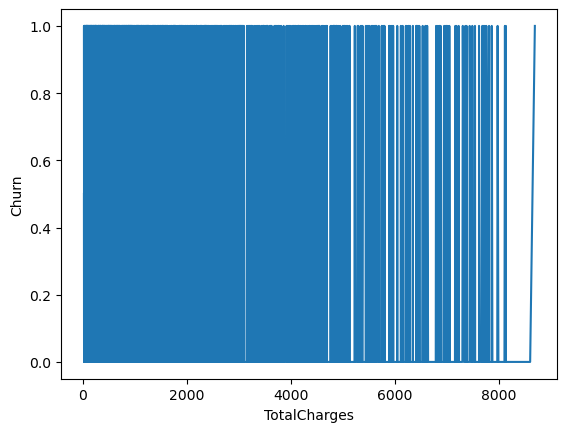

In [5]:
# line plot using matplot lib [TotalCharges vs Churn]
sns.lineplot(data = training_data, x = 'TotalCharges', y = 'Churn')

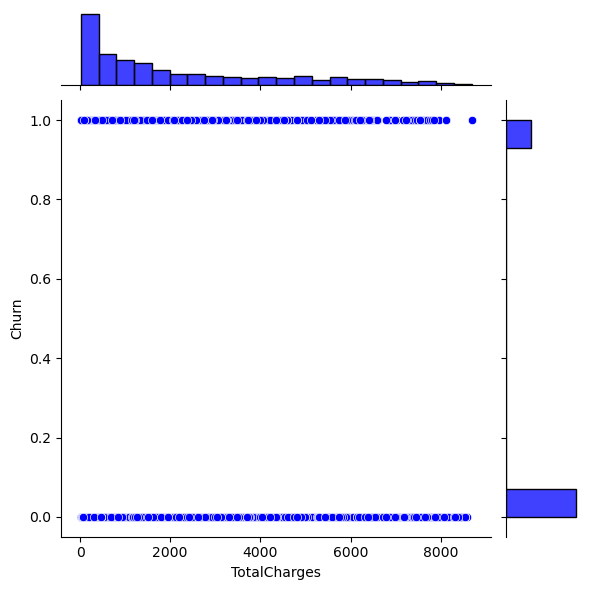

In [6]:
# joint plot
sns.jointplot(x = 'TotalCharges' ,y = 'Churn', data = training_data, color = 'blue')

In [13]:
# pair plot of sorted data
sortedData = training_data.sort_values(by = ['TotalCharges'])
sortedData.head(10)

,Unnamed: 0,MultipleLines,StreamingTV,StreamingMovies,MonthlyCharges,TotalCharges,Churn
493,1151,0,0,0,18.85,18.85,0
4385,6489,0,0,0,18.85,18.85,1
2813,583,0,0,0,19.00,19.00,0
4440,1733,0,0,0,19.05,19.05,0
3515,3110,0,0,0,19.10,19.10,0
1998,4348,0,0,0,19.10,19.10,1
3849,5336,0,0,0,19.10,19.10,0
2508,2989,0,0,0,19.20,19.20,0
4266,1816,0,0,0,19.20,19.20,0
186,5646,0,0,0,19.25,19.25,1


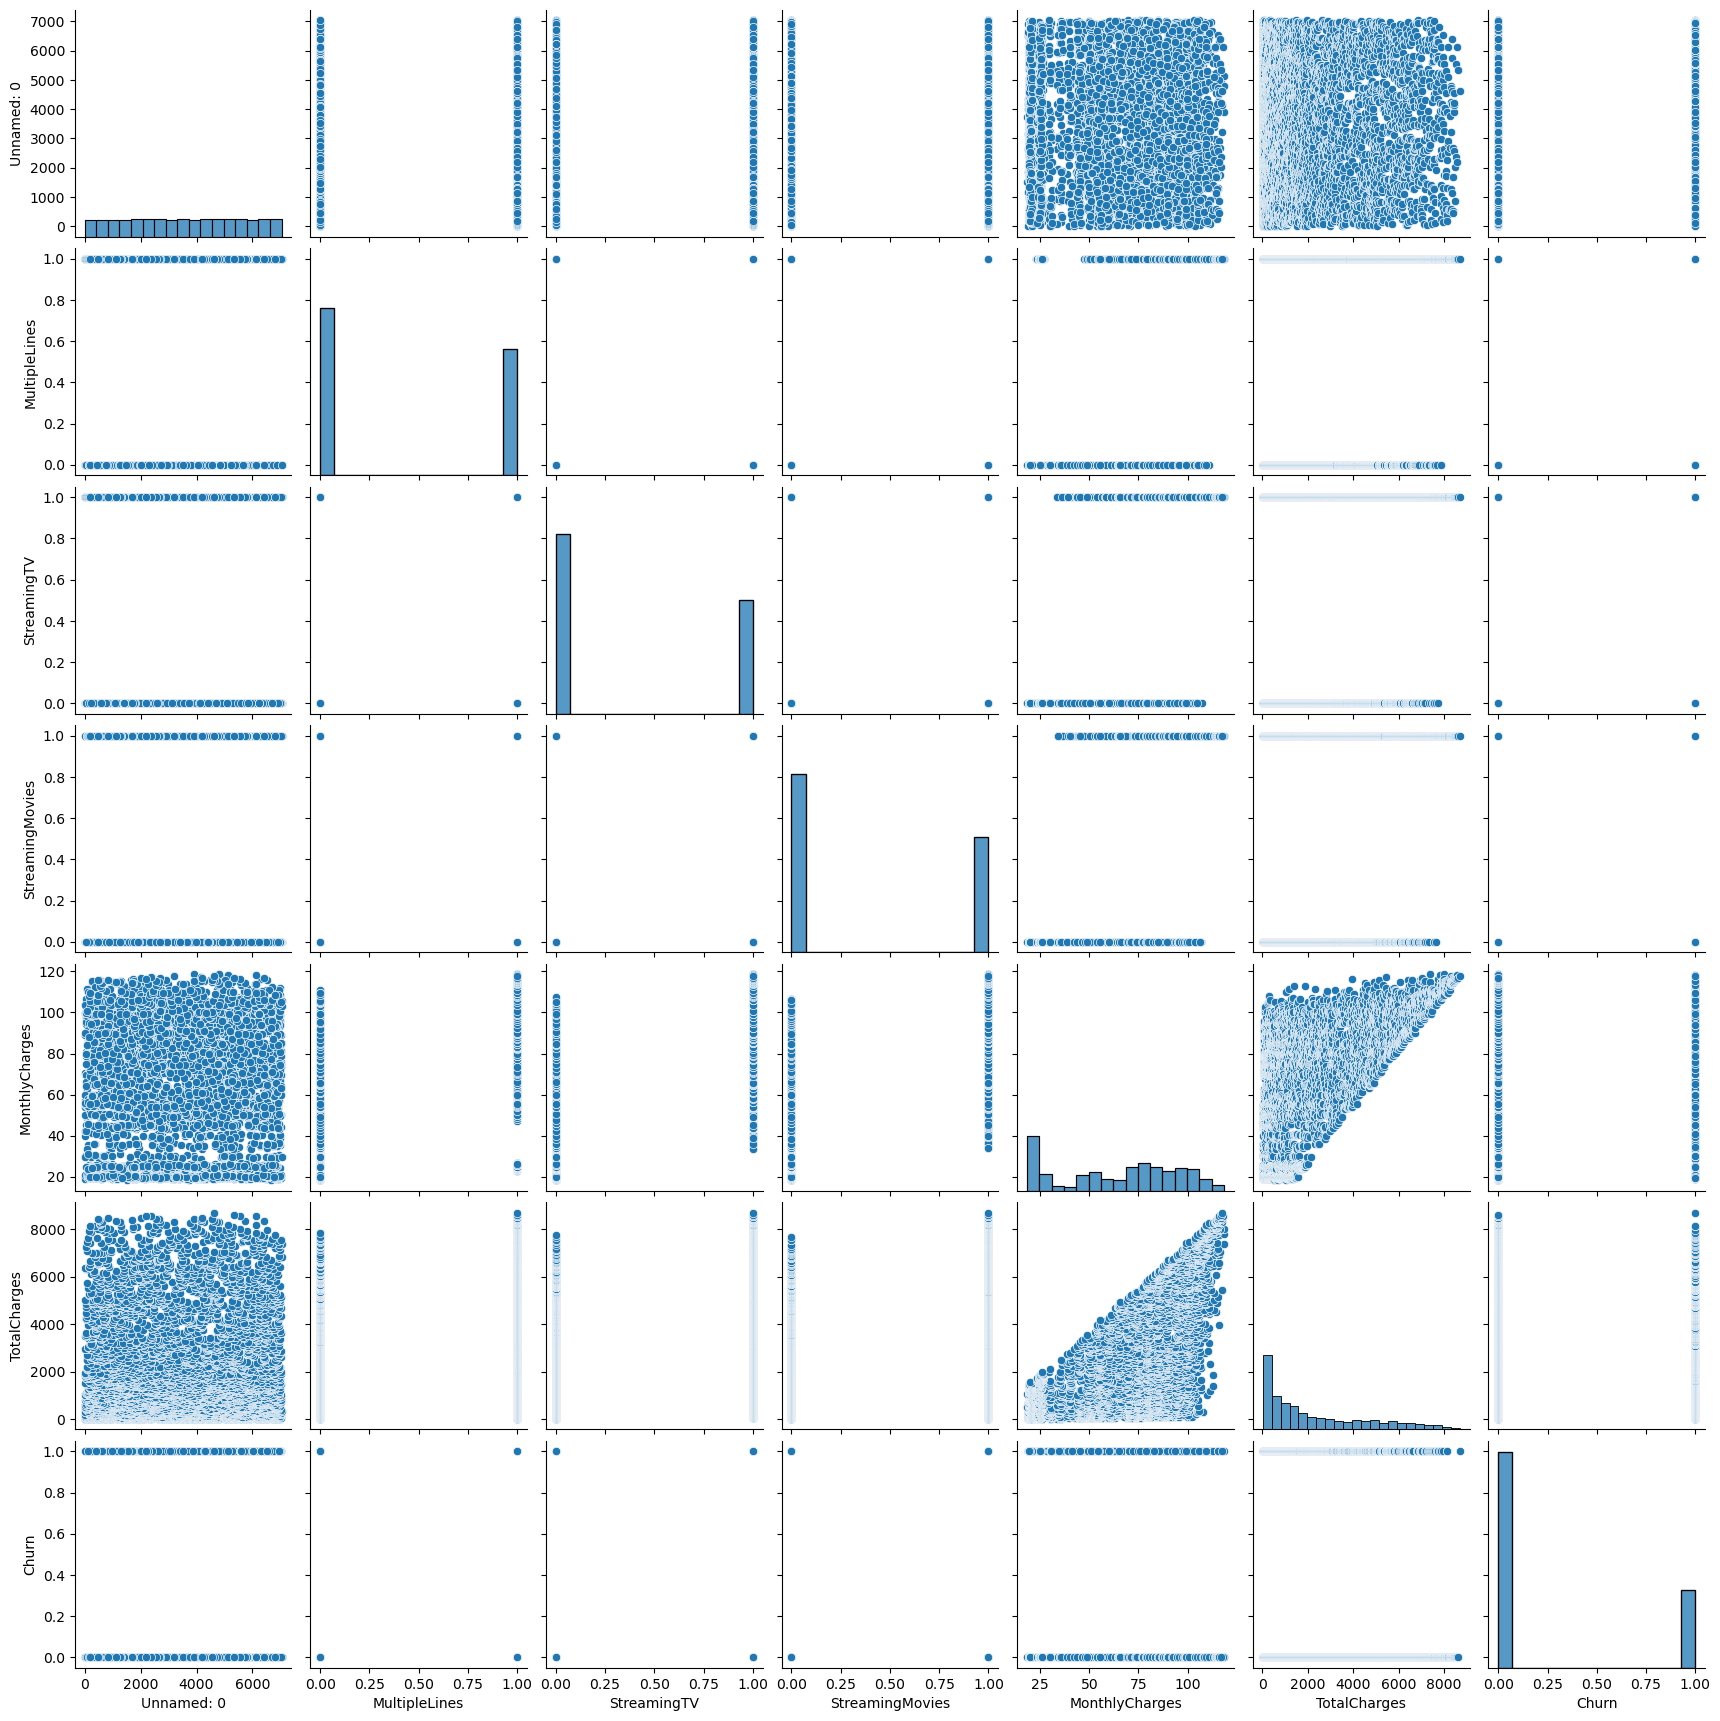

In [14]:
# pair plot of the sorted data
sns.pairplot(sortedData)

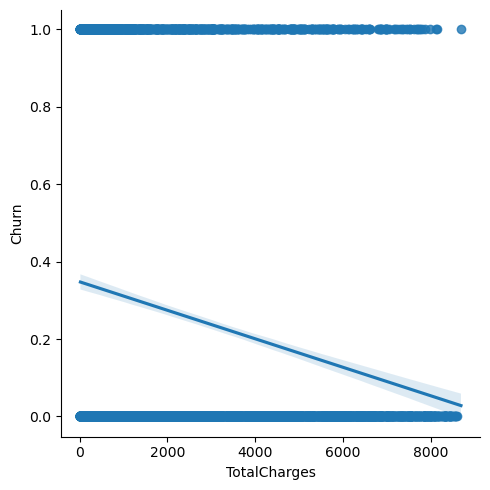

In [7]:
sns.lmplot(x = 'TotalCharges', y = 'Churn', data = training_data)

In [8]:
# training the model
regressor = LinearRegression(fit_intercept=True)
regressor.fit(X1_train, y1_train)

LinearRegression()

In [9]:
# print the slope 
print('Slope of the Line (m)', regressor.coef_) # note the slope is negative hence totalcharges and churn have an inverse relationship

# print the gradient
print('Gradient of the line (x)', regressor.intercept_)

Slope of the Line (m) [[-3.68282977e-05]]
Gradient of the line (x) [0.34792349]


In [10]:
#converting the totalcharges column from object dtype to float
testing["TotalCharges"] = pd.to_numeric(testing["TotalCharges"], errors='coerce')

# dropping the NaN values in the dataset
testing_data= testing.dropna(axis= 0, how='any')
x1_test = testing_data[['TotalCharges']]
# using x test data to predict y output(dependent variable) NB: test data should not be have been seen by the model
y_predict = regressor.predict(x1_test)
y_predict

array([[0.34701015],
       [0.31122593],
       [0.30992773],
       ...,
       [0.34603604],
       [0.08424393],
       [0.25899972]])

Text(0.5, 1.0, 'Total Charges vs Churn Visualization [Using test dataset vs predict dataset]')

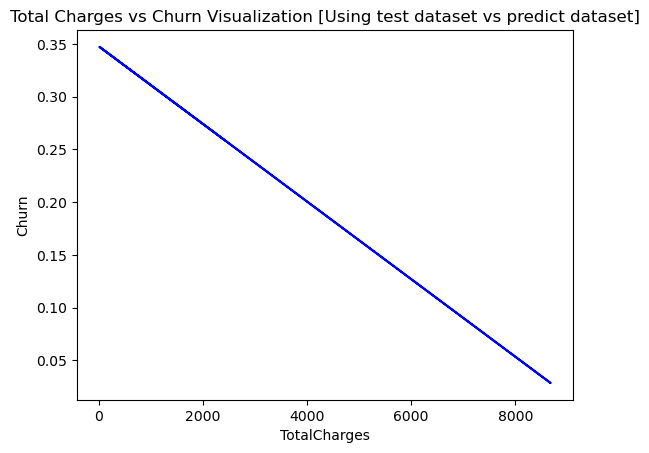

In [34]:
# ploting testing variable vs predict variable
plt.plot(x1_test, y_predict, color = 'blue')
plt.ylabel('Churn')
plt.xlabel('TotalCharges')
plt.title('Total Charges vs Churn Visualization [Using test dataset vs predict dataset]')
# if training was successful the slope should be negative (inverse relationship)

Text(0.5, 1.0, 'Total Charges vs Customer Churning [test data vs predict data]')

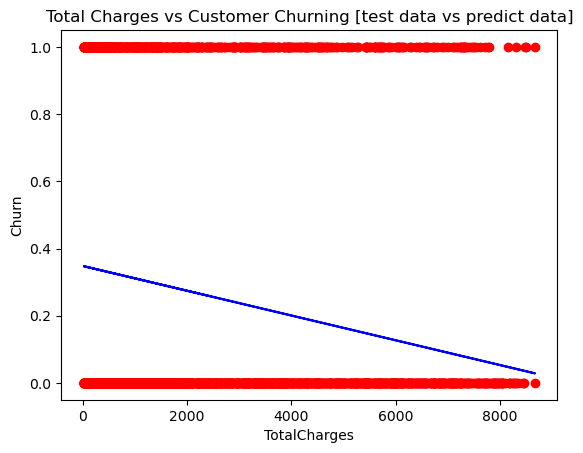

In [21]:
# plotting a scatter plot and line plot of test data vs predict dataset
dependent_variable = pd.read_csv('test_label.csv')
y1_test = dependent_variable[['Churn']]
x1_test.shape
plt.scatter(x1_test, y1_test, color = 'red')
plt.plot(x1_test, regressor.predict(x1_test), color = 'blue')
plt.ylabel('Churn')
plt.xlabel('TotalCharges')
plt.title('Total Charges vs Customer Churning [test data vs predict data]')


In [22]:
# case 2 i.e relationship between multiple lines and churn(customer churning)
# reading the training and testing dataset csv files
training = pd.read_csv("training.csv")
testing = pd.read_csv("testing.csv")
test_label = pd.read_csv("test_label.csv")

X2_train = training[['MultipleLines']] 
y2_train = training[['Churn']]
X2_test = testing[['MultipleLines']]

# training the model
regressor = LinearRegression(fit_intercept=True)
regressor.fit(X2_train, y2_train)


LinearRegression()

In [23]:
# print the slope 
print('Slope of the Line (m)', regressor.coef_) # note the slope is positive hence MultipleLines and Customer Churning are directly propotioanal 

# print the gradient
print('Gradient of the line (x)', regressor.intercept_)

Slope of the Line (m) [[0.03045748]]
Gradient of the line (x) [0.25]


Text(0.5, 1.0, 'Multiple lines vs Customer Churn (training dataset visualization)')

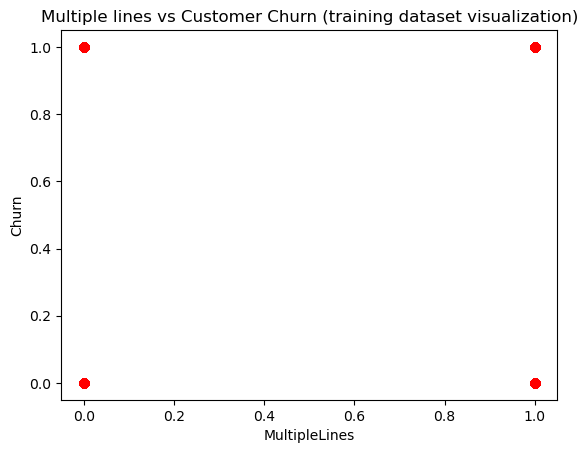

In [33]:
# plot a scatter plot of x_train vs y_train
plt.scatter(X2_train, y2_train, color = 'red')
plt.ylabel("Churn")
plt.xlabel("MultipleLines")
plt.title("Multiple lines vs Customer Churn (training dataset visualization)")

In [28]:
# testing the model with test dataset
#X_test = testing[['MultipleLines']]
y2_predict = regressor.predict(X2_test)
y2_predict

array([[0.25      ],
       [0.28045748],
       [0.25      ],
       ...,
       [0.25      ],
       [0.28045748],
       [0.28045748]])

Text(0.5, 1.0, 'Multiple lines vs Customer churn using test data and predict data')

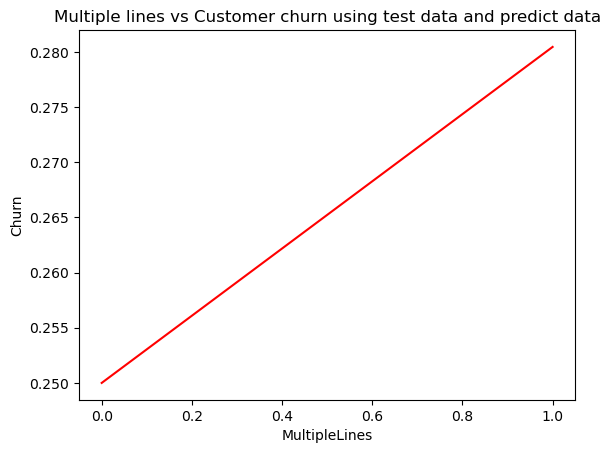

In [30]:
# ploting a line plot of test data vs predict data (slope should be positive)
plt.plot(X2_test, y2_predict, color = 'red')
plt.ylabel("Churn")
plt.xlabel("MultipleLines")
plt.title("Multiple lines vs Customer churn using test data and predict data")